In [1]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.1.11
matplotlib
numpy
"""
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
torch.manual_seed(1)    # reproducible
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

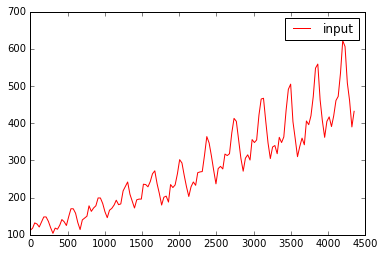

In [9]:
index = [3, 1]
data_path = '/home/ben/projects/techshare-pytorch/data/AirPassengers.csv'
content = np.genfromtxt(data_path, delimiter=',',skip_header=True)[:, index]
plt.plot(content[:, 0], content[:,1], 'r-', label='input')
plt.legend(loc='best')
plt.show()

In [ ]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [19]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [20]:
rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

h_state = None      # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

RNN (
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear (32 -> 1)
)


In [12]:
step = 1
start, end = step * np.pi, (step+1)*np.pi   # time range
start

3.141592653589793

In [13]:
end

6.283185307179586

In [14]:
steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)

In [15]:
steps

array([ 3.14159274,  3.49065852,  3.8397243 ,  4.18879032,  4.5378561 ,
        4.88692188,  5.23598766,  5.58505344,  5.93411922,  6.28318548], dtype=float32)

In [16]:
x_np = np.sin(steps)

In [17]:
x_np

array([ -8.74227766e-08,  -3.42020154e-01,  -6.42787576e-01,
        -8.66025448e-01,  -9.84807789e-01,  -9.84807730e-01,
        -8.66025448e-01,  -6.42787755e-01,  -3.42020363e-01,
         1.74845553e-07], dtype=float32)

In [21]:
for i in range(100):
    steps = content[:, 0]
    count = content[:, 1]
    x = Variable(torch.from_numpy(steps[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(count[np.newaxis, :, np.newaxis]))    
    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

TypeError: addmm_ received an invalid combination of arguments - got (int, int, torch.DoubleTensor, torch.FloatTensor), but expected one of:
 * (torch.DoubleTensor mat1, torch.DoubleTensor mat2)
 * (torch.SparseDoubleTensor mat1, torch.DoubleTensor mat2)
 * (float beta, torch.DoubleTensor mat1, torch.DoubleTensor mat2)
 * (float alpha, torch.DoubleTensor mat1, torch.DoubleTensor mat2)
 * (float beta, torch.SparseDoubleTensor mat1, torch.DoubleTensor mat2)
 * (float alpha, torch.SparseDoubleTensor mat1, torch.DoubleTensor mat2)
 * (float beta, float alpha, torch.DoubleTensor mat1, torch.DoubleTensor mat2)
      didn't match because some of the arguments have invalid types: ([32;1mint[0m, [32;1mint[0m, [32;1mtorch.DoubleTensor[0m, [31;1mtorch.FloatTensor[0m)
 * (float beta, float alpha, torch.SparseDoubleTensor mat1, torch.DoubleTensor mat2)
      didn't match because some of the arguments have invalid types: ([32;1mint[0m, [32;1mint[0m, [31;1mtorch.DoubleTensor[0m, [31;1mtorch.FloatTensor[0m)


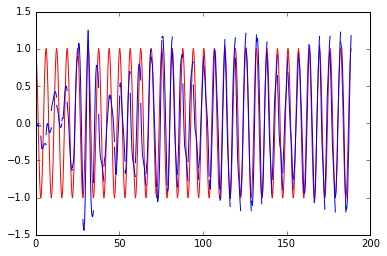

In [4]:
for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()